# Analyzing the Stropp Effect

### About the Stropp Effect:

The Stropp Effect is the delay in recation time between congruent and incongruent stimuli. The Stroop effect occurs when there is a mismatch between the name of a color and the color it is printed on. 

https://en.wikipedia.org/wiki/Stroop_effect

### 1. What is the independent variable? What is the dependent variable?

Independent Varaible: congruent or incongruent condition
<br>
Dependent Variable: Time taken to complete each test





### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The test will involve the mean times taken for each test (congruent and incongruent).

Null Hypothesis, $H_{0}$: There is no change in time between the congruent ($\mu_c$) and incongruent ($\mu_i$) tests.
<br>
Alternative Hypothesis, $H_{1}$: We obtain results where the congruent test ($\mu_c$) is not equal to the incongruent test ($\mu_i$). 

I'll be preforming a two-sided T-test on this data since we are comparing two sampling groups and we do not have data about the population. My hypothesis is that it should take longer to complete the Incongruent test than the Congruent test. 

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.


In [48]:
import math
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
data = pd.read_csv("stroopdata.csv")
data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [50]:
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

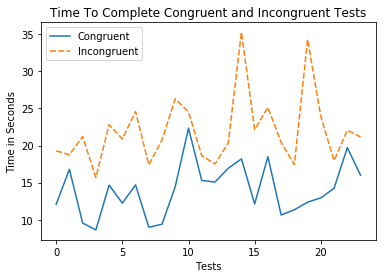

In [51]:
sns.lineplot(data=data)
plt.xlabel("Tests")
plt.ylabel("Time in Seconds")
plt.title("Time To Complete Congruent and Incongruent Tests")
plt.show()

The first graph shows that each of the Incongruent tests were longer than the corresponding Congruent test. 

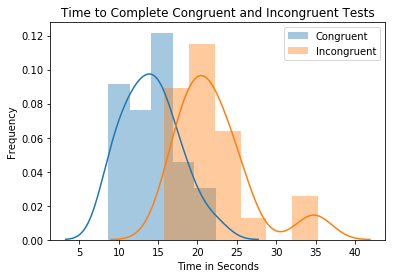

In [52]:
sns.distplot(data['Congruent'], label = "Congruent")
sns.distplot(data['Incongruent'], label = "Incongruent")
plt.xlabel("Time in Seconds")
plt.ylabel("Frequency")
plt.title("Time to Complete Congruent and Incongruent Tests")
plt.legend();

The Incongruent data shows that there is some skewing to the right of the data. This could be caused by an outlier or incorrect data in that set. 

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

I'll be prefroming a two tailed test so I'll need to get the t-critical value at a 95% confidence level.

In [53]:
print stats.t.ppf(1-0.025,23)

2.0686576104190406


I used the t-table to verify that we do get a t-critical value of 2.069 at a 95 percent confidence level

Now I need to caculate the difference between the congruent and incongruent tests. I'll make a new column in the dataframe to hold this data. Since I believe it will take longer to take the Incongruent test, I will subtract the incongruent fields from the congruent fields. 

In [60]:
data['diff'] = data['Incongruent'] - data['Congruent']
data.head()

,Congruent,Incongruent,diff
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


In [61]:
data.describe()

,Congruent,Incongruent,diff
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


The standard deviation of the difference is 4.86 with a mean of 7.96

Now I want to get the t score for the difference data. 

In [62]:
print (data['diff'].mean()/(data['diff'].std()/math.sqrt(24)))

8.02070694411


# Results of test

- Sample Size: 24
- Degree of Freedom : 23
- T Critical Value: 2.06
- Standard Deviation of Difference: 4.86
- Mean of Difference: 7.96
- T-Statistic: 8.02

Since the t-Statistic of 8.02 is well above the t-critical value of 2.06, we reject the null. The results of the test show that the Incongruent tests were significantly longer than the Congruent tests. 